#### This project aims to predict customer service categories for a telecommunications provider using demographic data. The company has previously segmented its customers into four distinct groups based on service usage patterns. These segments are represented by the target variable custcat. We're using demographic data, such as region, age, and marital, to predict usage patterns.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# loading the dataset
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [3]:
# see if it's a balanced dataset
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

In [8]:
# visualizing correlation between the features
df_correlation = df.corr()
df_correlation

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


<Axes: >

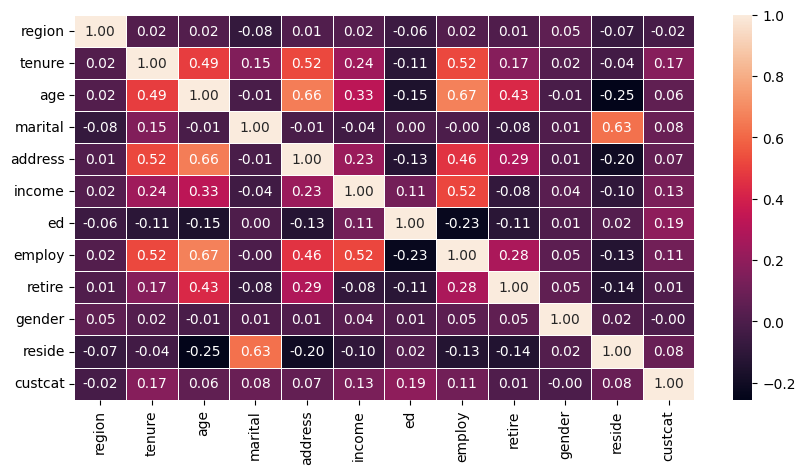

In [23]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df_correlation, annot=True,fmt='.2f',linewidths=0.5)

In [28]:
# We want to identify the features that have a higher correlation with the target variable.
abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [96]:
# train test split
X = df.drop('custcat', axis=1)
X_scaled = scaler.fit_transform(X)
y = df.custcat
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2,random_state=42)

In [97]:
# building the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [98]:
# finding the score
knn.score(X_test, y_test)

0.365

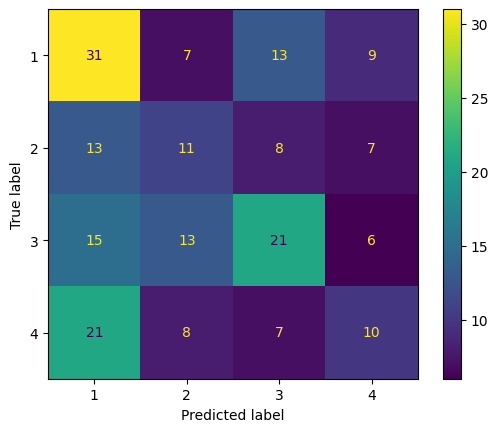

In [99]:
# clasification report & confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

In [112]:
# training the model for different values of k
#1- (1,10)
#2-  (1,30)
#3- (1,100)

[0.29, 0.34, 0.365, 0.325, 0.33, 0.33, 0.33, 0.335, 0.33, 0.35]

In [152]:
# 1- (1,10)
kr = 10
score = []

for k in range(1,kr+1):
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train,y_train)
    score.append(knn1.score(X_test,y_test))

print(f"max score is {max(score)} at k = {score.index(max(score))+1}")

max score is 0.365 at k = 3


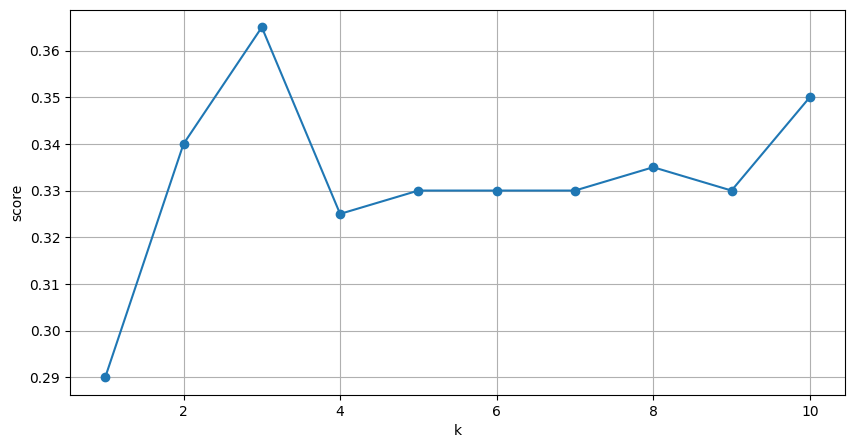

In [153]:
plt.figure(figsize=(10,5))
plt.plot(range(1,kr+1),score,marker = 'o')
plt.xlabel('k')
plt.ylabel('score')
plt.grid(True)
plt.show()

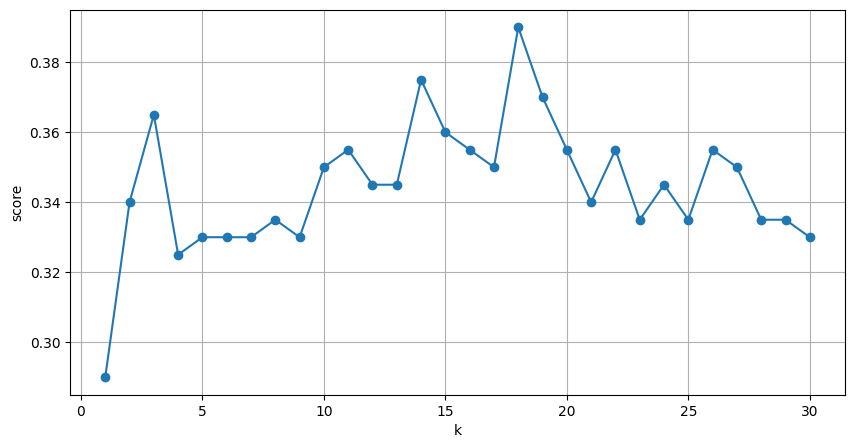

max score is 0.39 at k = 18


In [154]:
#2- (1,30)
kr = 30
score = []

for k in range(1,kr+1):
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train,y_train)
    score.append(knn1.score(X_test,y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,kr+1),score,marker = 'o')
plt.xlabel('k')
plt.ylabel('score')
plt.grid(True)
plt.show()

print(f"max score is {max(score)} at k = {score.index(max(score))+1}")

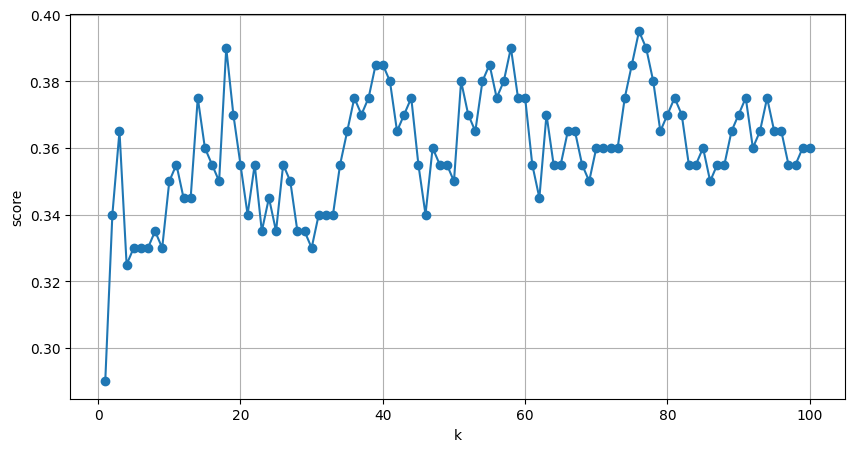

max score is 0.395 at k = 76


In [158]:
#3- (1,100)
kr = 100
score = []

for k in range(1,kr+1):
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train,y_train)
    score.append(knn1.score(X_test,y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,kr+1),score,marker = 'o')
plt.xlabel('k')
plt.ylabel('score')
plt.grid(True)
plt.show()

print(f"max score is {max(score)} at k = {score.index(max(score))+1}")

The KNN model performs poorly because customer segments are not clearly separable in the raw feature space, distance-based similarity becomes unreliable in high-dimensional data, and the algorithm gives equal importance to all features, allowing weak or irrelevant variables to introduce noise into neighbor selection